# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from glob import glob
import sys, os
import cv2

from tensorflow.keras.applications.vgg16 import VGG16 as pretrained, preprocess_input


In [3]:
!wget https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg

--2020-06-03 11:41:08--  https://www.theluxecafe.com/wp-content/uploads/2014/07/ferrari-spider-indian-theluxecafe.jpg
Resolving www.theluxecafe.com (www.theluxecafe.com)... 103.50.163.41
Connecting to www.theluxecafe.com (www.theluxecafe.com)|103.50.163.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95114 (93K) [image/jpeg]
Saving to: ‘ferrari-spider-indian-theluxecafe.jpg’

ferrari-spider-indi 100%[===================>]  92.88K   416KB/s    in 0.2s    

2020-06-03 11:41:09 (416 KB/s) - ‘ferrari-spider-indian-theluxecafe.jpg’ saved [95114/95114]



In [4]:
!ls 

ferrari-spider-indian-theluxecafe.jpg  sample_data


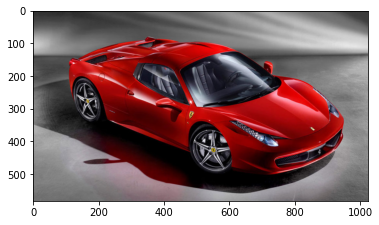

In [18]:
X = cv2.imread('ferrari-spider-indian-theluxecafe.jpg')
X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
plt.imshow(X)

In [19]:
print(X.shape)

(582, 1024, 3)


In [0]:
IMAGE_SIZE = X.shape

In [21]:
IMAGE_SIZE

(582, 1024, 3)

In [0]:
X = np.expand_dims(X, axis=0)

In [26]:
print(X.shape)

(1, 582, 1024, 3)


In [23]:
C = 3
pretrained_model = pretrained(input_shape = IMAGE_SIZE,
                              weights = 'imagenet',
                              include_top = False)


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
model = Model(pretrained_model.input, pretrained_model.output)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 582, 1024, 64)     1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 582, 1024, 64)     36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 291, 512, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 291, 512, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 291, 512, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 145, 256, 128)     0     

In [28]:
model.layers

In [0]:
conv_layers = []
for i in model.layers:
  if 'conv' in i.name:
    conv_layers.append(i)

In [32]:
conv_layers

In [0]:
layer = 0

In [34]:
conv_layer = conv_layers[layer]
print(conv_layer)

In [35]:
filters, biases = conv_layer.get_weights()
print(conv_layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)


In [0]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

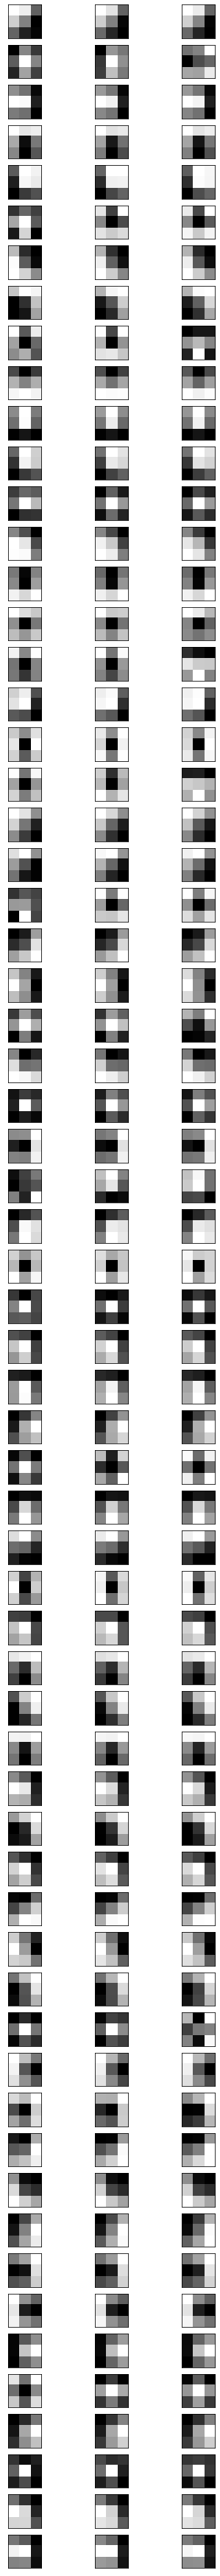

In [40]:
plt.figure(figsize=(6,64))
n_filters, idx = filters.shape[3], 1
for i in range(n_filters):
	# get filter
	f = filters[:, :, :, i]
	for j in range(3):
		ax = plt.subplot(n_filters, 3, idx)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		idx += 1
plt.show()

In [0]:
model_visual = Model(inputs=model.inputs, outputs=conv_layer.output)

In [42]:
model_visual.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 582, 1024, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 582, 1024, 64)     1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [43]:
maps = model_visual(X)
print(maps.shape)

(1, 582, 1024, 64)


In [48]:
maps.shape[3]

64

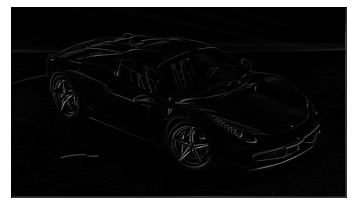

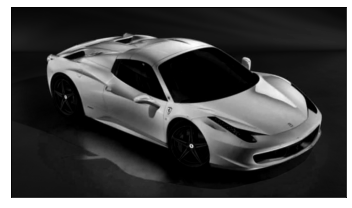

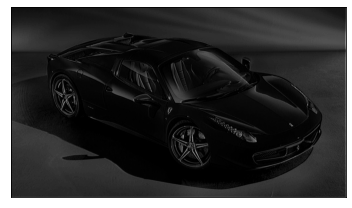

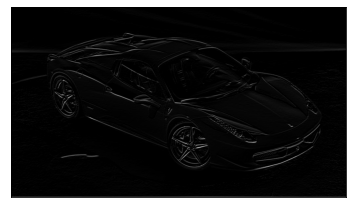

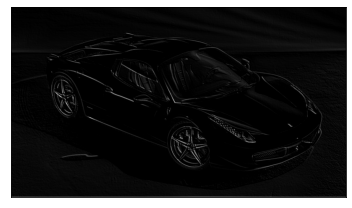

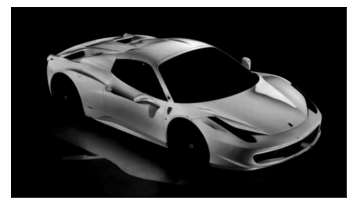

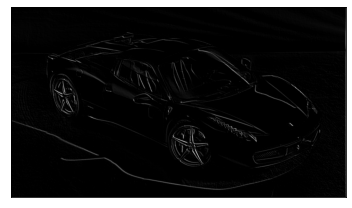

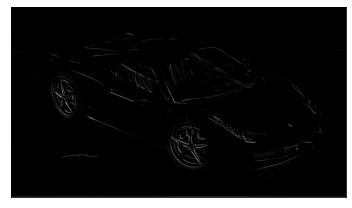

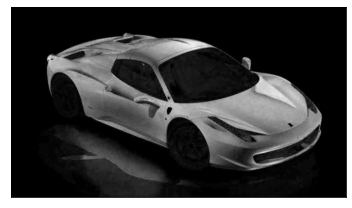

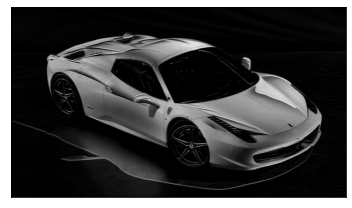

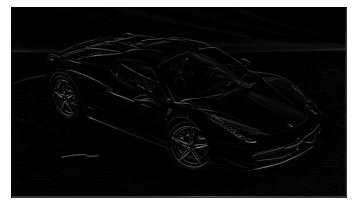

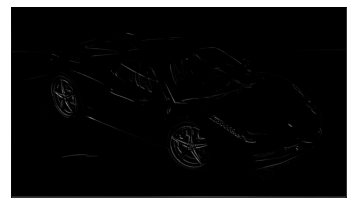

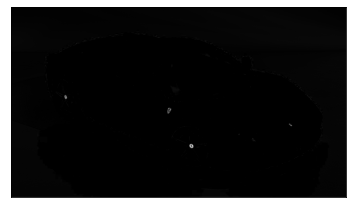

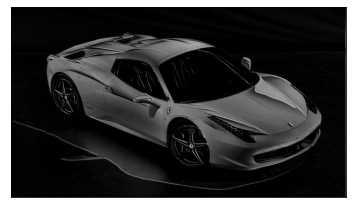

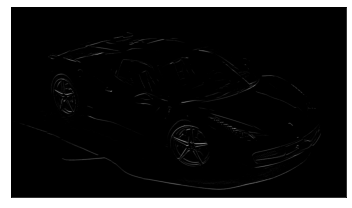

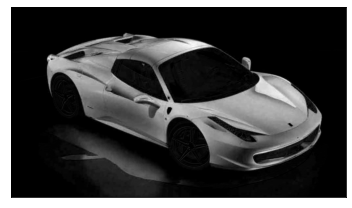

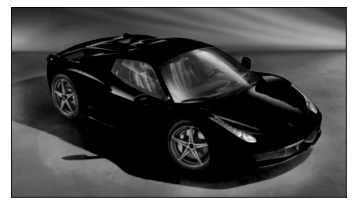

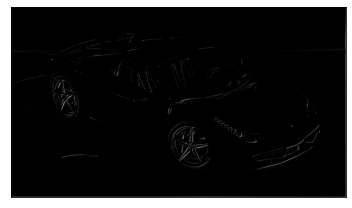

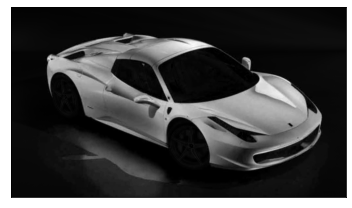

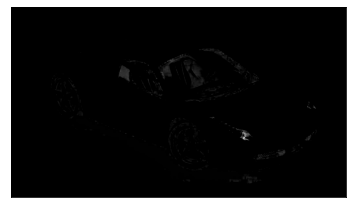

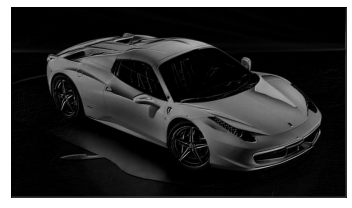

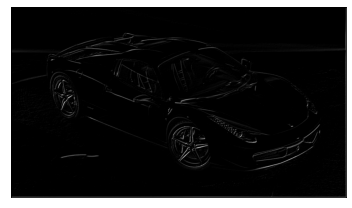

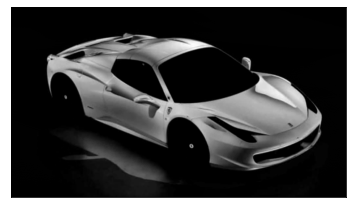

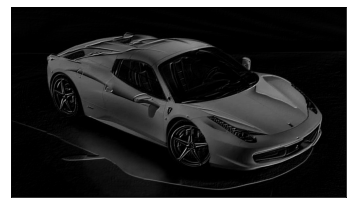

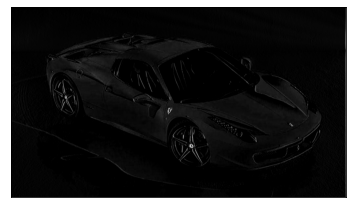

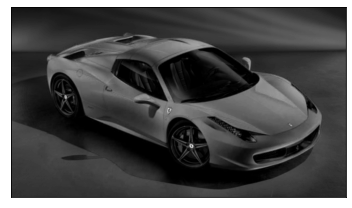

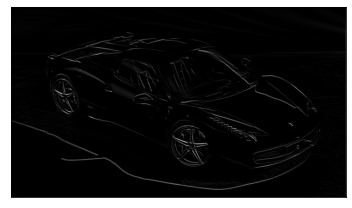

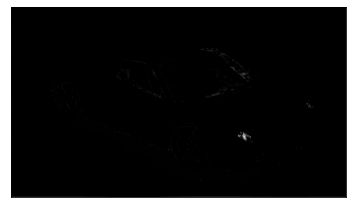

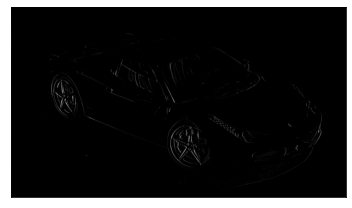

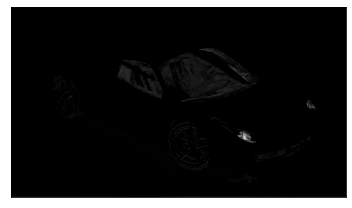

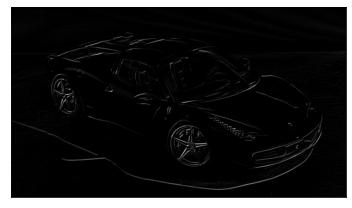

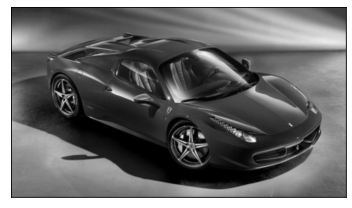

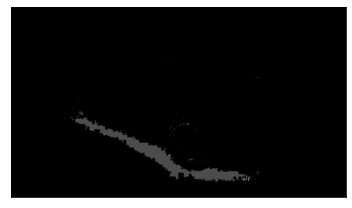

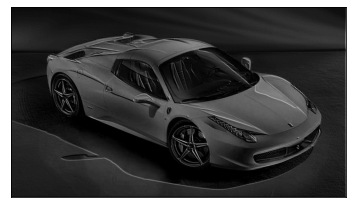

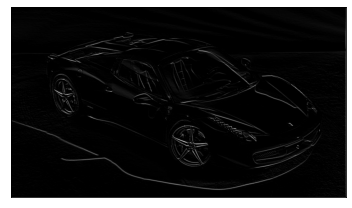

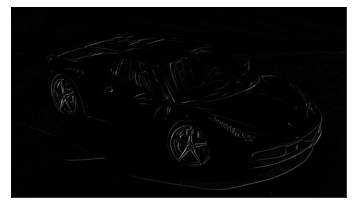

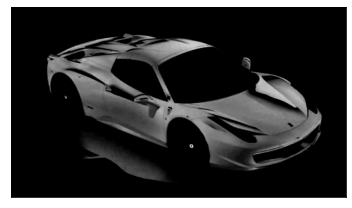

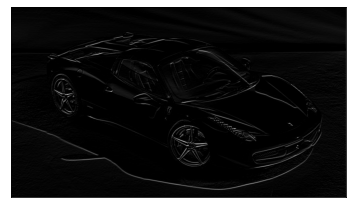

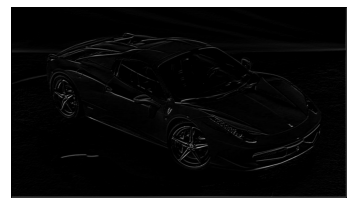

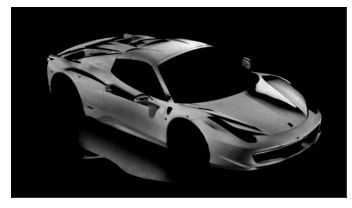

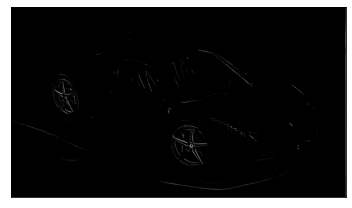

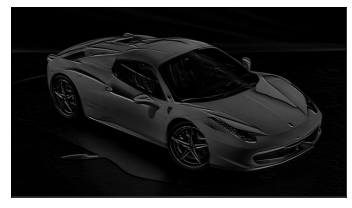

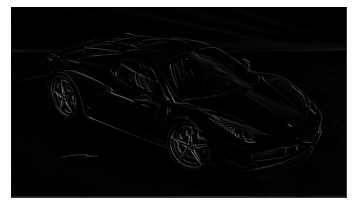

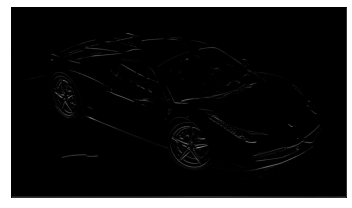

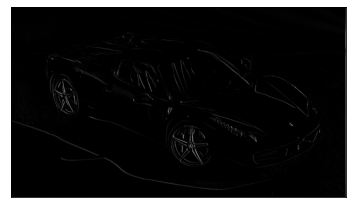

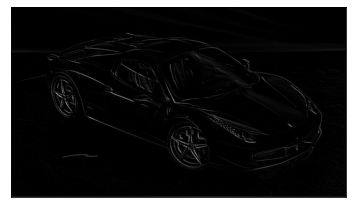

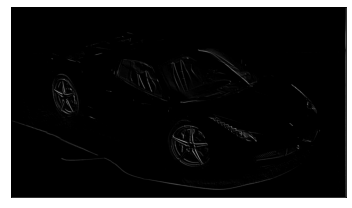

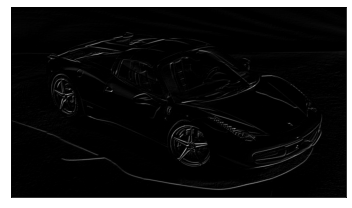

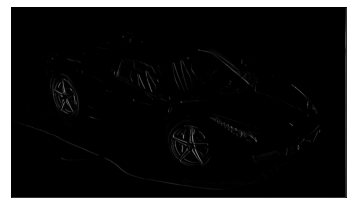

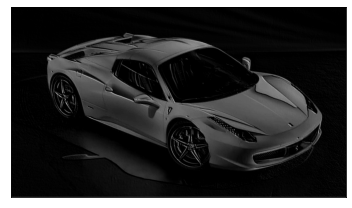

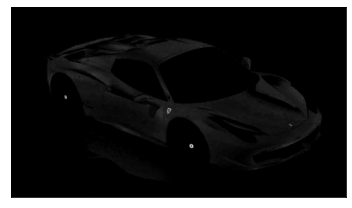

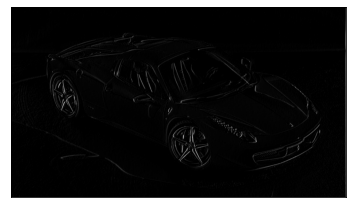

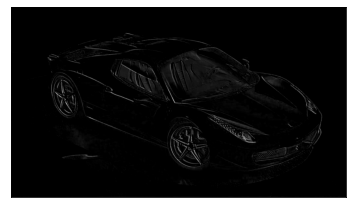

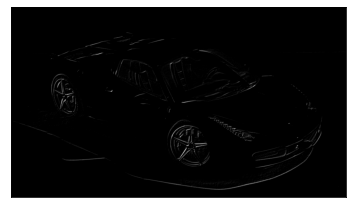

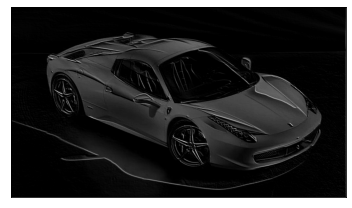

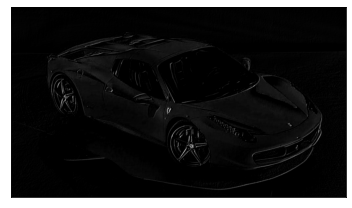

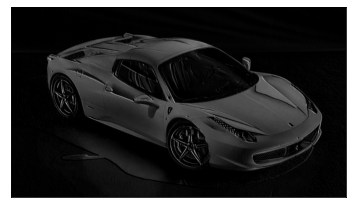

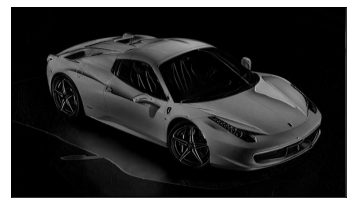

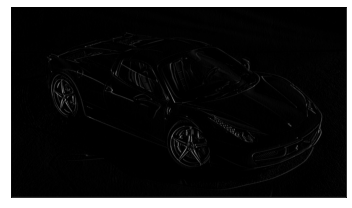

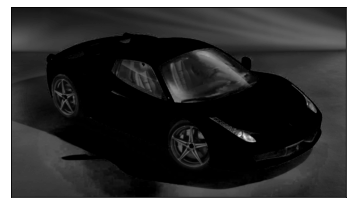

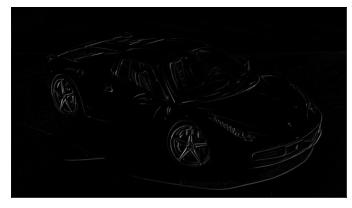

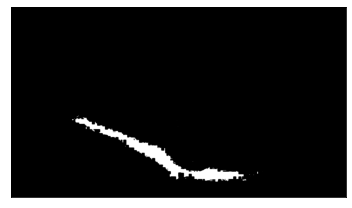

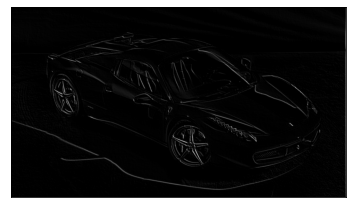

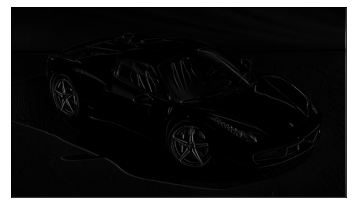

In [49]:
for i in range(maps.shape[3]):
  ax = plt.subplot()
  plt.imshow(maps[0, :, :, i], cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()